## Here, we will write code to form the Filled fermi sea state


In [2]:
# Let u first understand how to writ coefficiens of a superposition state

from qiskit import QuantumCircuit
import qiskit_aer 
from qiskit.quantum_info.states.random import random_statevector
from qiskit.circuit.library import Initialize
from qiskit.visualization import plot_bloch_multivector

state_backend = qiskit_aer.StatevectorSimulator()

def initrstate(qc, label=""):
   state = random_statevector((2,1)).data
   print(state) # if you want to see what state you have initialized the qubit to
   init = Initialize(state)
   init.label = label
   return init

def viewstate(qc):
   result = execute(qc, state_backend).result()
   fstate = result.get_statevector()
   print(fstate) # This will be the superposition state
   return fstate

qc = QuantumCircuit(2)
init1 = initrstate(qc)
init2 = initrstate(qc)
qc.append(init1, [0])
qc.append(init2, [1])

plot_bloch_multivector(viewstate(qc)) #Plot the state vectors on the bloch sphere


[ 0.43421011+0.41520328j -0.01982273-0.79917137j]
[0.50427628-0.41218466j 0.75418697-0.08373325j]


NameError: name 'execute' is not defined

In [4]:
# Let us first create the array for k values to be used
import numpy as np


def array_k1(num_qubits):  #assuming num_qubits is even
    array_k = []
    m = num_qubits/2
    if (m)%2!=0: #replace with m-1 for previous results
        for j in range(-int((m)//2),int((m)//2) + 1): #replace with m-1 for previous results
            array_k.append(2*np.pi*j/num_qubits)
    else:
        for j in range(-int((m)//2),int((m)//2)):
            array_k.append(2*np.pi*j/num_qubits)
    return array_k

print(array_k1(6))


        



[-1.0471975511965976, 0.0, 1.0471975511965976]


In [38]:
num_qubits = 6

In [39]:
# Now we have an array, let us make the matrix on which we are going to store the proper k values

coeff_array = []
array_k = array_k1(num_qubits)
for k in array_k:
    pos_list = []
    for x in range(num_qubits):
        pos_list.append(np.exp(-1j*k*x))
    coeff_array.append(pos_list)

coeff_array = np.array(coeff_array)
print(coeff_array)


[[ 1. +0.00000000e+00j  0.5+8.66025404e-01j -0.5+8.66025404e-01j
  -1. +1.22464680e-16j -0.5-8.66025404e-01j  0.5-8.66025404e-01j]
 [ 1. +0.00000000e+00j  1. +0.00000000e+00j  1. +0.00000000e+00j
   1. +0.00000000e+00j  1. +0.00000000e+00j  1. +0.00000000e+00j]
 [ 1. +0.00000000e+00j  0.5-8.66025404e-01j -0.5-8.66025404e-01j
  -1. -1.22464680e-16j -0.5+8.66025404e-01j  0.5+8.66025404e-01j]]


In [17]:
'0'<'5' #checking how sorting works in character strings

True

In [6]:
def sort_bitstr(bitstr):
    bit_array = []
    for i in bitstr:
        bit_array.append(i)
    #print(bit_array)
    bitstr_sorted = ''
    for i in range(len(bit_array)):
        bit_array[i] = int(bit_array[i])
    bit_array.sort()
    #print(bit_array)
    for i in bit_array:
        #print(i,str(i))
        bitstr_sorted += str(i)
        #print(bitstr_sorted)

    return bitstr_sorted

print(sort_bitstr('02317'))

01237


In [7]:
def hammingDist(str1, str2): 
    i = 0
    count = 0
  
    while(i < len(str1)): 
        if(str1[i] != str2[i]): 
            count += 1
        i += 1
    return count 

def perm_str2(cmpr,word):
    from itertools import combinations, cycle

   #  word = 'eyssaasse' base string
   # cmpr = 'seasysaes'  a string to find number of swaps from the base string
    swaps = 0

    # 1)
    chars = {c: [] for c in word}
    [chars[c].append(i) for i, c in enumerate(word)]
    for k in chars.keys():
        chars[k] = cycle(chars[k])

    # 2)
    idxs = [next(chars[c]) for c in cmpr]

    # 3)
    for cmb in combinations(idxs, 2):
        if cmb[0] > cmb[1]:
            swaps += 1

    #print(swaps)
    if swaps%2 == 0:
        return 1
    else:
        return -1

def perm_str(bitstr,bitstr_sorted):
    c = hammingDist(bitstr,bitstr_sorted)
    if c%2 == 0:
        if int(c/2)%2 == 0:
            return 1
        else:
            return -1
    else:
        if int(c/2)%2 == 0:
            return -1
        else:
            return 1
    
bitstr = '043125'
bitstr_sorted = sort_bitstr(bitstr)

print(perm_str2(bitstr,bitstr_sorted))
print(perm_str(bitstr,bitstr_sorted))

-1
1


In [40]:
# Now we have the coefficient array, let us use recursive calls to form the dict

#m = int(num_qubits/2) # taking always even number of qubits
l = 0  
coeff_dict = {}
coeff_dict_wr = {}
def recursive_nested(l,num_qubits,coeff = 1,bitstr=''):

    m = int(num_qubits/2) # taking always even number of qubits

    #coeff_dict_2 = {}
    if l==m-1: # m-1, but we start with 0 indexing
        coeff_copy = coeff  #to ensure multiplied coeffs in previous rounds is preserved and reused
        bitstr_copy = bitstr
        for i in range(num_qubits):
            if str(i) in bitstr:
                pass
            else:
                coeff = coeff*coeff_array[l,i]
                bitstr = bitstr + f'{i}'
                bitstr_sorted = sort_bitstr(bitstr) #to sort the string first
                perm = perm_str2(bitstr,bitstr_sorted) # to compare hamming distance
                #if perm != perm_str(bitstr,bitstr_sorted):
                    #print('Here is where it does not match!')
                if bitstr_sorted in coeff_dict.keys():
                    coeff_dict[bitstr_sorted]+=coeff*perm
                else:
                    coeff_dict[bitstr_sorted] = coeff*perm
            bitstr = bitstr_copy
            coeff = coeff_copy
    if l!=m-1:
        coeff_copy = coeff  #to ensure multiplied coeffs in previous rounds is preserved and reused
        bitstr_copy = bitstr
        for i in range(num_qubits):
            if str(i) in bitstr:
                pass
            else:
                #print(coeff)
                coeff = coeff*coeff_array[l,i]
                bitstr += str(i)
                recursive_nested(l+1,num_qubits,coeff,bitstr)
            bitstr = bitstr_copy
            coeff = coeff_copy

    return coeff_dict

def recursive_nested_wr(l,num_qubits,coeff = 1,bitstr=''):  #without the perm_str2 function

    m = int(num_qubits/2) # taking always even number of qubits

    #coeff_dict_2 = {}
    if l==m-1: # m-1, but we start with 0 indexing
        coeff_copy = coeff  #to ensure multiplied coeffs in previous rounds is preserved and reused
        bitstr_copy = bitstr
        for i in range(num_qubits):
            if str(i) in bitstr:
                pass
            else:
                coeff = coeff*coeff_array[l,i]
                bitstr = bitstr + f'{i}'
                bitstr_sorted = sort_bitstr(bitstr) #to sort the string first
                perm = perm_str(bitstr,bitstr_sorted) # to compare hamming distance
                if bitstr_sorted in coeff_dict_wr.keys():
                    coeff_dict_wr[bitstr_sorted]+=coeff*perm
                else:
                    coeff_dict_wr[bitstr_sorted] = coeff*perm
            bitstr = bitstr_copy
            coeff = coeff_copy
    if l!=m-1:
        coeff_copy = coeff  #to ensure multiplied coeffs in previous rounds is preserved and reused
        bitstr_copy = bitstr
        for i in range(num_qubits):
            if str(i) in bitstr:
                pass
            else:
                #print(coeff)
                coeff = coeff*coeff_array[l,i]
                bitstr += str(i)
                recursive_nested_wr(l+1,num_qubits,coeff,bitstr)
            bitstr = bitstr_copy
            coeff = coeff_copy

    return coeff_dict_wr
            

#print(coeff_array)
print(recursive_nested(l,num_qubits))
#print(recursive_nested_wr(l,num_qubits))



{'012': (-1.1102230246251565e-16+1.7320508075688772j), '013': (1.1102230246251565e-16+3.464101615137755j), '014': (1.1102230246251565e-16+3.464101615137755j), '015': 1.7320508075688785j, '023': (1.1102230246251565e-16+3.4641016151377544j), '024': 5.196152422706632j, '025': 3.464101615137756j, '034': (-1.1102230246251565e-16+3.4641016151377544j), '035': (-1.1102230246251565e-16+3.464101615137756j), '045': 1.7320508075688783j, '123': (-1.1102230246251565e-16+1.7320508075688772j), '124': 3.4641016151377544j, '125': 3.464101615137755j, '134': 3.464101615137754j, '135': 5.196152422706632j, '145': (1.1102230246251565e-16+3.4641016151377544j), '234': (1.1102230246251565e-16+1.7320508075688767j), '235': 3.464101615137754j, '245': (1.1102230246251565e-16+3.464101615137754j), '345': (1.1102230246251565e-16+1.7320508075688763j)}


In [9]:
#Now that we have got the dictionary of phases, we make a complex vector

coeff_list = [0]*num_qubits
for bstr in coeff_dict.keys():
    for k in range(int(num_qubits/2)-1):
        coeff_list[int(bstr[k])]+= coeff_dict[bstr]

print(coeff_list)

[(-2118.033988749896-2.5112224375403137e-14j), (-2118.033988749896+2.7422508708241367e-14j), (-2118.0339887498967+1.9317880628477724e-14j), (-2118.033988749896+2.55351295663786e-14j), (-2116.853648862397+2.1649348980190553e-15j), (-2096.853648862398+1.2713754367987882e-14j), (-1968.591269649904-3.036289898746819e-14j), (-1542.6237921249267-2.4645250410648636e-14j), (-747.2135954999577-3.2340116412918874e-14j), 0]


In [10]:
# let us see if statevector initialization ensures normalization
import qiskit
from qiskit.quantum_info import Statevector


In [11]:
data = np.array([1,1]).reshape(1,2)
print(data)
sv = Statevector([1,1])
sv.data

[[1 1]]


array([1.+0.j, 1.+0.j])

In [41]:
#let us normalize our vector

phase_array = np.array(coeff_list)
phase_array = phase_array/np.linalg.norm(phase_array)

# to use state vector formalism, we need to initialize bitstrings
bitstr_dict = {}
coeff_dict = recursive_nested(l,num_qubits)
for bstr in coeff_dict.keys():
    vac_str = ''
    num_list = []
    for k in range(int(num_qubits/2)):
        num_list.append(int(bstr[k]))

    for i in range(num_qubits):
        if i in num_list:
            vac_str += '1'
        else:
            vac_str += '0'
    bitstr_dict[vac_str] = coeff_dict[bstr]

print(bitstr_dict)

"""bitstr_dict_wr = {}
for bstr in coeff_dict_wr.keys():
    vac_str = ''
    num_list = []
    for k in range(int(num_qubits/2)):
        num_list.append(int(bstr[k]))

    for i in range(num_qubits):
        if i in num_list:
            vac_str += '1'
        else:
            vac_str += '0'
    bitstr_dict_wr[vac_str] = coeff_dict_wr[bstr]

#print(bitstr_dict_wr)"""





{'111000': (-1.1102230246251565e-16+3.464101615137754j), '110100': (1.1102230246251565e-16+6.928203230275509j), '110010': (1.1102230246251565e-16+6.928203230275509j), '110001': 3.464101615137757j, '101100': (1.1102230246251565e-16+6.928203230275508j), '101010': 10.392304845413266j, '101001': 6.928203230275513j, '100110': (-1.1102230246251565e-16+6.928203230275508j), '100101': (-1.1102230246251565e-16+6.928203230275513j), '100011': 3.464101615137757j, '011100': (-1.1102230246251565e-16+3.464101615137754j), '011010': 6.928203230275509j, '011001': 6.92820323027551j, '010110': 6.928203230275507j, '010101': 10.392304845413264j, '010011': (1.1102230246251565e-16+6.928203230275508j), '001110': (1.1102230246251565e-16+3.464101615137753j), '001101': 6.928203230275508j, '001011': (1.1102230246251565e-16+6.928203230275507j), '000111': (1.1102230246251565e-16+3.464101615137752j)}


"bitstr_dict_wr = {}\nfor bstr in coeff_dict_wr.keys():\n    vac_str = ''\n    num_list = []\n    for k in range(int(num_qubits/2)):\n        num_list.append(int(bstr[k]))\n\n    for i in range(num_qubits):\n        if i in num_list:\n            vac_str += '1'\n        else:\n            vac_str += '0'\n    bitstr_dict_wr[vac_str] = coeff_dict_wr[bstr]\n\n#print(bitstr_dict_wr)"

In [42]:
fermi_state = Statevector([0]*(2**num_qubits))

for bstr in bitstr_dict.keys():
    fermi_state += Statevector.from_label(bstr)*bitstr_dict[bstr]

val_array = []
for i in bitstr_dict.values():
    val_array.append(i)
val_array = np.array(val_array)
#print(val_array)
print(np.linalg.norm(val_array))
fermi_state = fermi_state/np.linalg.norm(val_array)
print(fermi_state)
fermi_state.is_valid()

"""fermi_state_wr = Statevector([0]*(2**num_qubits))
for bstr in bitstr_dict_wr.keys():
    fermi_state_wr += Statevector.from_label(bstr)*bitstr_dict_wr[bstr]

val_array = []
for i in bitstr_dict_wr.values():
    val_array.append(i)
val_array = np.array(val_array)
#print(val_array)
print(np.linalg.norm(val_array))
fermi_state_wr = fermi_state_wr/np.linalg.norm(val_array)
print(fermi_state_wr)
fermi_state_wr.is_valid()

#Let us check if the wrong fermi state is still correct

fermi_state.equiv(fermi_state_wr)"""


29.393876913398138
Statevector([ 0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ,
              0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ,
              0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ,
              0.00000000e+00+0.j        ,  3.77705543e-18+0.11785113j,
              0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ,
              0.00000000e+00+0.j        ,  3.77705543e-18+0.23570226j,
              0.00000000e+00+0.j        ,  0.00000000e+00+0.23570226j,
              3.77705543e-18+0.11785113j,  0.00000000e+00+0.j        ,
              0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ,
              0.00000000e+00+0.j        ,  3.77705543e-18+0.23570226j,
              0.00000000e+00+0.j        ,  0.00000000e+00+0.35355339j,
              0.00000000e+00+0.23570226j,  0.00000000e+00+0.j        ,
              0.00000000e+00+0.j        ,  0.00000000e+00+0.23570226j,
              0.00000000e+00+0.23570226j,  0.00000000e+00+

'fermi_state_wr = Statevector([0]*(2**num_qubits))\nfor bstr in bitstr_dict_wr.keys():\n    fermi_state_wr += Statevector.from_label(bstr)*bitstr_dict_wr[bstr]\n\nval_array = []\nfor i in bitstr_dict_wr.values():\n    val_array.append(i)\nval_array = np.array(val_array)\n#print(val_array)\nprint(np.linalg.norm(val_array))\nfermi_state_wr = fermi_state_wr/np.linalg.norm(val_array)\nprint(fermi_state_wr)\nfermi_state_wr.is_valid()\n\n#Let us check if the wrong fermi state is still correct\n\nfermi_state.equiv(fermi_state_wr)'

In [14]:
from qiskit import QuantumCircuit
import qiskit_aer 
from qiskit.quantum_info.states.random import random_statevector
from qiskit.circuit.library import Initialize
from qiskit.visualization import plot_bloch_multivector

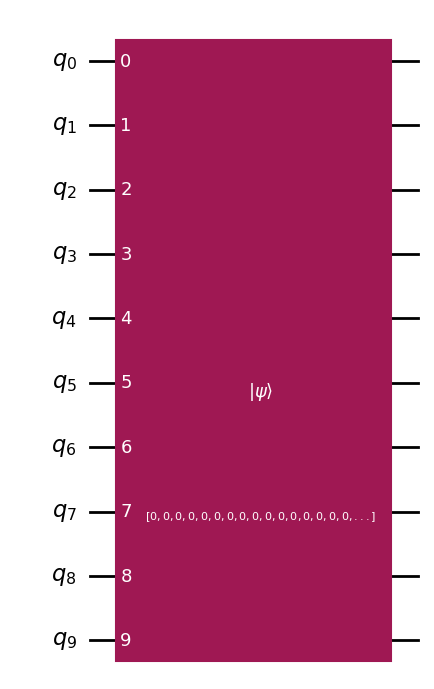

In [15]:
qc = QuantumCircuit(num_qubits)
qc.initialize(fermi_state)

qc.draw(output = 'mpl')

In [20]:
# Let us compare fidelities with other states
from qiskit.quantum_info import state_fidelity

#Creating the other states
sv_boundary = Statevector.from_label('0000011111')
sv_ghz = (Statevector.from_label('++++++++++') + Statevector.from_label('----------'))/np.sqrt(2)

print(sv_ghz.is_valid())

print('Overlap of Fermi Sea state with boundary wall:',state_fidelity(sv_boundary,fermi_state))
print('Overlap of Fermi Sea state with ghz state:',state_fidelity(sv_ghz,fermi_state))

True
Overlap of Fermi Sea state with boundary wall: 1.39320225002103e-05
Overlap of Fermi Sea state with ghz state: 0.0


In [87]:
sv_3 = (Statevector.from_label('010101') + Statevector.from_label('101010'))/np.sqrt(2)
print('Overlap of Fermi Sea state with sv_3:',state_fidelity(sv_3,fermi_state))

Overlap of Fermi Sea state with sv_3: 0.25


## Testing the Fermi sea State

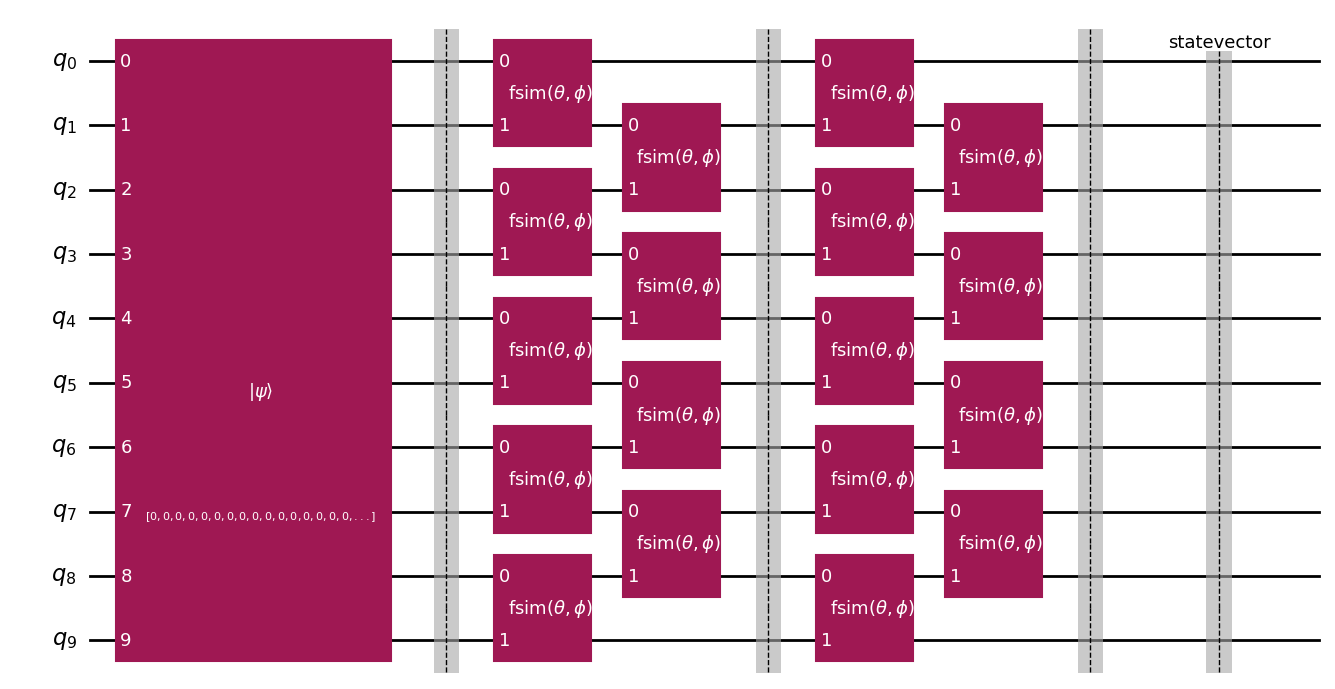

In [17]:
# Let us see whether if the state is a eigenvector of the free fermion circuit or not
from qiskit_aer import AerSimulator
from qiskit import transpile

simulator_aer = AerSimulator()

from qiskit.quantum_info import Operator
import math as m
import cmath as cm

def fsim(theta,phi,beta):
    fsim = Operator([[1,0,0,0],
                   [0,m.cos(theta),1j*cm.exp(1j*beta)*m.sin(theta),0],
                   [0,1j*cm.exp(-1j*beta)*m.sin(theta),m.cos(theta),0],
                   [0,0,0,cm.exp(1j*phi)]])
    return fsim

def circuit(num_qubits, pos1, trotter_steps,angles = [0,0,0], num_cl_bits = 0, trotter_barriers = False):
    if num_cl_bits == 0:
        qc = QuantumCircuit(num_qubits)
    else:
        qc = QuantumCircuit(num_qubits, num_cl_bits)
    qc.initialize(fermi_state)
    qc.barrier()
    for trotter_step in range(trotter_steps):
        add_fsim(qc,angles)
        if trotter_barriers:
            qc.barrier()

    qc.save_statevector()  #this is to check the statevector after a fixed number of trotter steps
    return qc

def add_fsim(qc,angles):
    theta = angles[0]
    phi = angles[1]
    beta = angles[2]

    fsim1 = fsim(theta,phi,beta)
    #Adding fsim in even layers
    for i in range(0,qc.num_qubits-1,2):
        qc.unitary(fsim1,[i,i+1],label = r'fsim$(\theta,\phi)$')
        
    #Adding fsim in odd layers
    for i in range(1,qc.num_qubits-1,2):
        qc.unitary(fsim1,[i,i+1],label = r'fsim$(\theta,\phi)$')


num_qubits = 10
trotter_steps = 2
pos1 = 3
angles = [np.pi/20,0,0]
qc = circuit(num_qubits,pos1,trotter_steps,angles,trotter_barriers = True)
qc.draw(output = 'mpl')



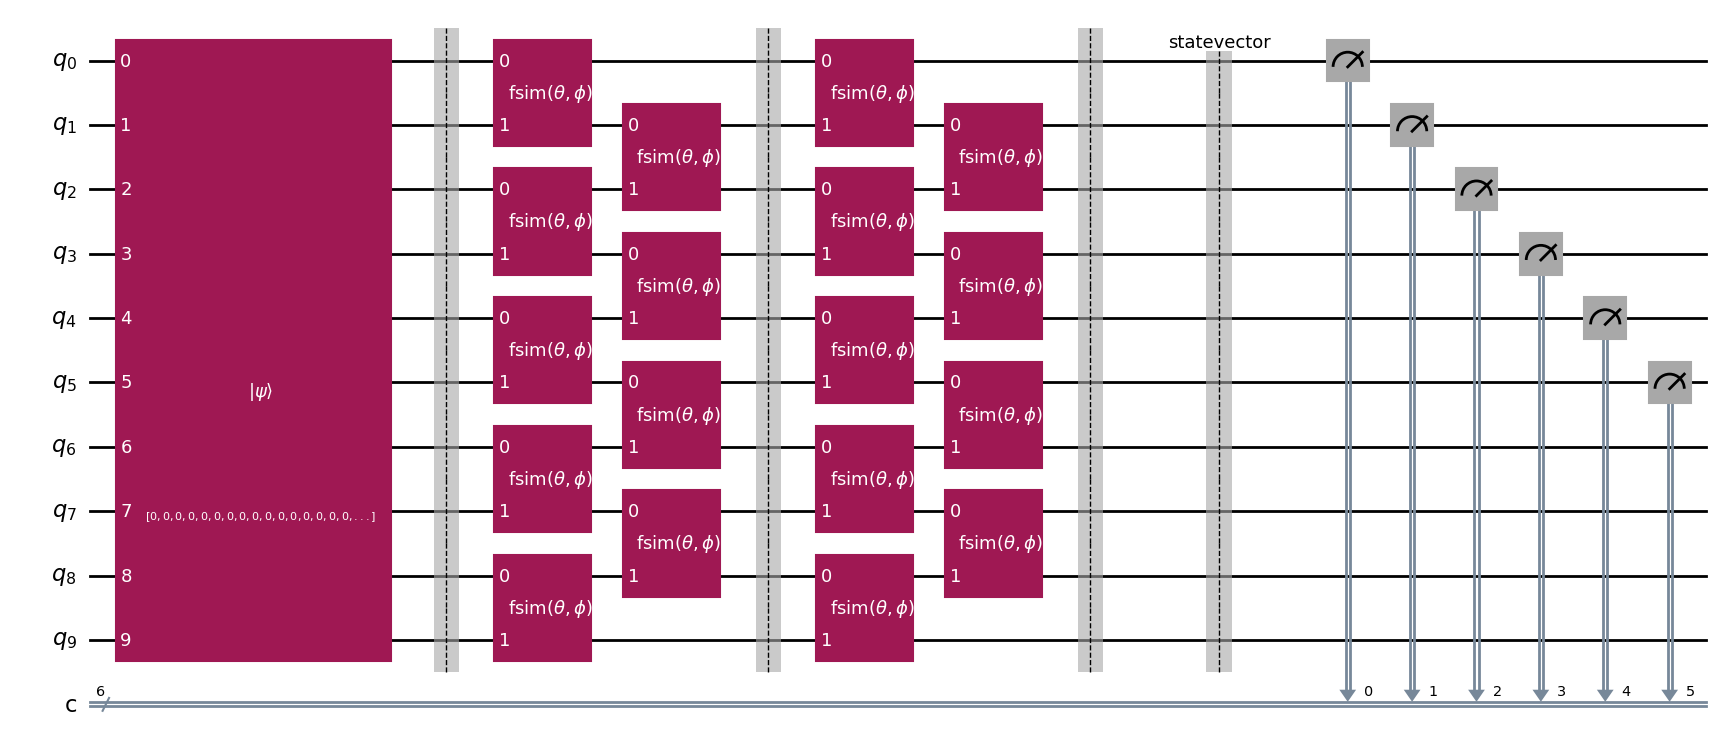

In [18]:
max_trotter_steps = 10
measured_bits =[0,1,2,3,4,5]

qc_list = []
for trotter_steps in range(max_trotter_steps):
    qc = circuit(num_qubits,pos1, trotter_steps, angles, num_cl_bits = len(measured_bits), trotter_barriers = True)
    qc.measure(measured_bits,list(range(len(measured_bits))))
    qc_list.append(qc)

qc_list[2].draw(output = "mpl")

In [21]:

print("Theta is,", angles[0], "Phi is,", angles[1], "Beta is,", angles[2],"and the number of qubits is", num_qubits)
print()
def fidelity_checks(qc, trotter_steps):
    qc_aer = transpile(qc, backend=simulator_aer)
    result = simulator_aer.run(qc_aer).result()

    final_state = result.get_statevector()
    print(f"Fidelity after {trotter_steps} trotter steps is", state_fidelity(final_state, fermi_state), "and overlap is ", np.abs(np.dot(final_state,fermi_state)))

for trotter_steps in range(max_trotter_steps):
    fidelity_checks(qc_list[trotter_steps],trotter_steps)

Theta is, 0.15707963267948966 Phi is, 0 Beta is, 0 and the number of qubits is 10

Fidelity after 0 trotter steps is 1.0 and overlap is  1.0
Fidelity after 1 trotter steps is 0.9917924749496454 and overlap is  0.9958877823076481
Fidelity after 2 trotter steps is 0.9682034532616686 and overlap is  0.9839732990593132
Fidelity after 3 trotter steps is 0.9320924396364668 and overlap is  0.9654493459713289
Fidelity after 4 trotter steps is 0.8875086091479184 and overlap is  0.9420767533210436
Fidelity after 5 trotter steps is 0.8388770423937988 and overlap is  0.9159023105079487
Fidelity after 6 trotter steps is 0.7902523734064554 and overlap is  0.888961401527904
Fidelity after 7 trotter steps is 0.7448125657018672 and overlap is  0.8630252404778594
Fidelity after 8 trotter steps is 0.7046483422497566 and overlap is  0.8394333459243543
Fidelity after 9 trotter steps is 0.6708039191873493 and overlap is  0.8190262017709502


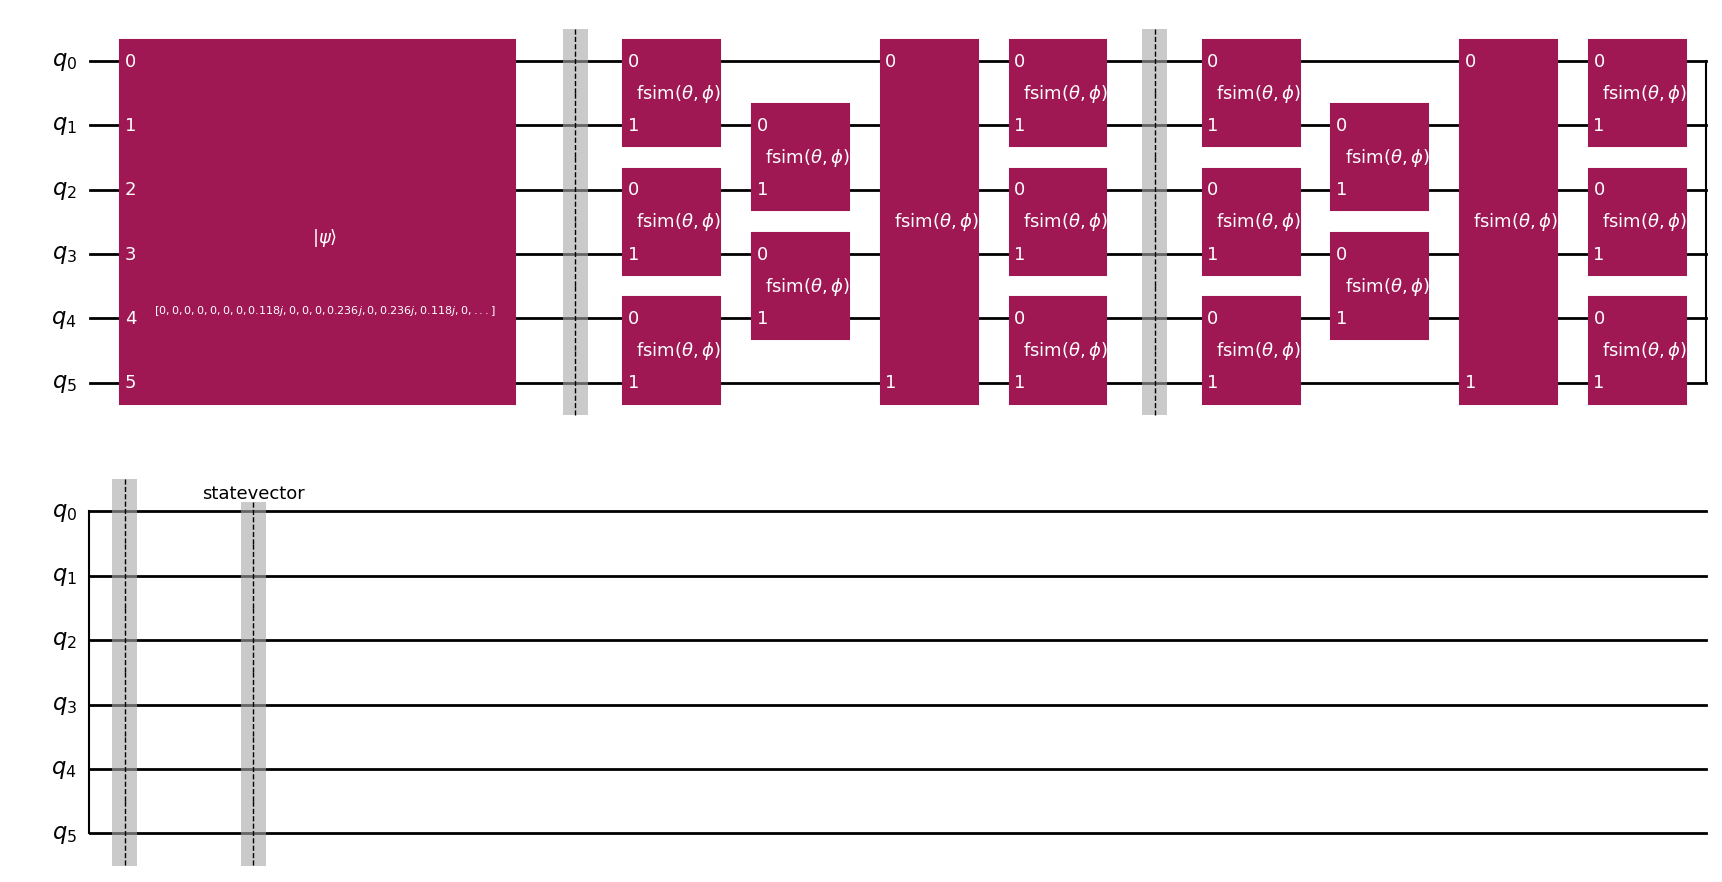

In [45]:
# Let us try a more symmetrised version with a ring circuit

def circuit_sym(num_qubits, trotter_steps,angles = [0,0,0], num_cl_bits = 0, trotter_barriers = False):
    if num_cl_bits == 0:
        qc = QuantumCircuit(num_qubits)
    else:
        qc = QuantumCircuit(num_qubits, num_cl_bits)
    qc.initialize(fermi_state)
    qc.barrier()
    for trotter_step in range(trotter_steps):
        add_fsim_sym(qc,angles)
        if trotter_barriers:
            qc.barrier()

    qc.save_statevector()  #this is to check the statevector after a fixed number of trotter steps
    return qc

def add_fsim_sym(qc,angles):
    theta = angles[0]
    phi = angles[1]
    beta = angles[2]

    fsim1 = fsim(theta/2,phi,beta)
    fsim2 = fsim(theta,phi,beta)
    #Adding fsim in even layers
    for i in range(0,qc.num_qubits-1,2):
        qc.unitary(fsim1,[i,i+1],label = r'fsim$(\theta,\phi)$')
        
    #Adding fsim in odd layers
    for i in range(1,qc.num_qubits-1,2):
        qc.unitary(fsim2,[i,i+1],label = r'fsim$(\theta,\phi)$')

    qc.unitary(fsim2,[0,qc.num_qubits-1],label = r'fsim$(\theta,\phi)$')

    #Adding fsim in even layers
    for i in range(0,qc.num_qubits-1,2):
        qc.unitary(fsim1,[i,i+1],label = r'fsim$(\theta,\phi)$')

trotter_steps = 2

qc = circuit_sym(num_qubits,trotter_steps,angles,trotter_barriers = True)
qc.draw(output = 'mpl')

In [46]:
print("Theta is,", angles[0], "Phi is,", angles[1], "Beta is,", angles[2],"and the number of qubits is", num_qubits)
print()

qc_list_2 = []
for t in range(max_trotter_steps):
    qc = circuit_sym(num_qubits, t, angles, num_cl_bits = len(measured_bits), trotter_barriers = True)
    qc.measure(measured_bits,list(range(len(measured_bits))))
    qc_list_2.append(qc)

qc_list_2[2].draw(output = "mpl")

for trotter_steps in range(max_trotter_steps):
    fidelity_checks(qc_list_2[trotter_steps],trotter_steps)

Theta is, 0.15707963267948966 Phi is, 0 Beta is, 0 and the number of qubits is 6

Fidelity after 0 trotter steps is 1.0 and overlap is  1.0
Fidelity after 1 trotter steps is 0.9999986089934202 and overlap is  0.9999993044964682
Fidelity after 2 trotter steps is 0.9999945713075493 and overlap is  0.9999972856500908
Fidelity after 3 trotter steps is 0.9999882797755378 and overlap is  0.9999941398705984
Fidelity after 4 trotter steps is 0.9999803465063761 and overlap is  0.9999901732049051
Fidelity after 5 trotter steps is 0.9999715433272166 and overlap is  0.9999857715623841
Fidelity after 6 trotter steps is 0.9999627266882903 and overlap is  0.9999813631704795
Fidelity after 7 trotter steps is 0.9999547543383406 and overlap is  0.9999773769132683
Fidelity after 8 trotter steps is 0.9999484018779019 and overlap is  0.9999742006061466
Fidelity after 9 trotter steps is 0.9999442873080028 and overlap is  0.9999721432660026


In [25]:
# Let us try to code up the free fermion hamiltonian and see whether filled fermi sea is an eigenstate of it or not
def int_to_bin(x, n):
    return format(x, 'b').zfill(n)


type(int_to_bin(3,6))
        

str

In [26]:
import re

def check_substr_pos(str1,substr1):
    list1 = [match.start() for match in re.finditer(substr1, str1)]

    return list1

def swap_str_pos(str1,pos):
    i=0
    str2 = ''
    while i < len(str1):
        if i == pos:
            str2 += str1[i+1] + str1[i]
            i+=2
        else:
            str2 += str1[i]
            i+=1
    return str2

def bin_to_int(str1):
    return int(str1,2)

test1 = check_substr_pos('010101','01')
print(test1)
str_test = swap_str_pos('010101',test1[0])
print(str_test)

print(bin_to_int(str_test))






[0, 2, 4]
100101
37


In [36]:
st2 = "abcdef"
st3 = st2[-1] + st2[1:-1] + st2[0]

print(st3)

fbcdea


In [37]:
t = 1

def create_ff_fam(num_qubits):
    ff_ham_list = []
    for i in range(2**num_qubits):
        list1 = []
        i_bin = int_to_bin(i,num_qubits)
        if '01' or '10' in i_bin:
            arr1 = check_substr_pos(i_bin,'01')
            arr2 = check_substr_pos(i_bin,'10')
            swap1_arr = [swap_str_pos(i_bin,pos) for pos in arr1]
            swap2_arr = [swap_str_pos(i_bin,pos) for pos in arr2]
            if int(i_bin[0]) + int(i_bin[-1]) == 1:
                str3 = i_bin[-1] + i_bin[1:-1] + i_bin[0]
                swap1_arr.append(str3)
                swap2_arr.append(str3)

            for j in range(2**num_qubits):
                j_bin = int_to_bin(j,num_qubits)
                if j_bin in swap1_arr or j_bin in swap2_arr:
                    list1.append(-t)
                else:
                    list1.append(0)
            ff_ham_list.append(list1)
        else:
            ff_ham_list.append([0]*2**num_qubits)
    return ff_ham_list

def check_symmetric(a, rtol=1e-05, atol=1e-08): #check if matrix formed is real symmetric or not
    return np.allclose(a, a.T, rtol=rtol, atol=atol)

ff_ham= create_ff_fam(3)
ff_ham= np.array(ff_ham)
print(check_symmetric(ff_ham))
print(ff_ham)

True
[[ 0  0  0  0  0  0  0  0]
 [ 0  0 -1  0 -1  0  0  0]
 [ 0 -1  0  0 -1  0  0  0]
 [ 0  0  0  0  0 -1 -1  0]
 [ 0 -1 -1  0  0  0  0  0]
 [ 0  0  0 -1  0  0 -1  0]
 [ 0  0  0 -1  0 -1  0  0]
 [ 0  0  0  0  0  0  0  0]]


In [47]:
from qiskit.quantum_info import state_fidelity

print("Number of qubits used:",num_qubits)

ff_ham_new = create_ff_fam(num_qubits)
ff_ham_new = np.array(ff_ham_new)
#print(check_symmetric(ff_ham_new))

# Let us try to see if the fermi sea state is an eigenvector of the free fermion hamiltonian

final_state = np.dot(ff_ham_new,fermi_state)
final_state = final_state/np.linalg.norm(final_state)

final_state = Statevector(final_state)
#print(final_state.is_valid())

rtol = 10e-7
atol = 10e-7
print("Absolute Tolerance:",atol,"Relative Tolerance:",rtol)
print()


print('Overlap of Fermi state with free fermion hamiltonian evolved fermi state:',np.sqrt(state_fidelity(final_state,fermi_state)))
print("Is the fermi state an eigenvector of the Free Fermion Hamiltoinian:",fermi_state.equiv(final_state,rtol = rtol, atol=atol))
print()

"""final_state_wr = np.dot(ff_ham_new,fermi_state_wr)
final_state_wr = final_state_wr/np.linalg.norm(final_state_wr)

final_state_wr = Statevector(final_state_wr)
#print(final_state_wr.is_valid())

print('Overlap of (wrong) Fermi state with free fermion hamiltonian evolved fermi state:',np.sqrt(state_fidelity(final_state_wr,fermi_state_wr)))
print("Is the (wrong) fermi state an eigenvector of the Free Fermion Hamiltoinian:",fermi_state_wr.equiv(final_state_wr,rtol = rtol, atol=atol))
print()

print("Are the wrong and correct fermi states equivalent:",fermi_state.equiv(fermi_state_wr,rtol = 10e-8, atol=10e-8))"""



Number of qubits used: 6
Absolute Tolerance: 1e-06 Relative Tolerance: 1e-06

Overlap of Fermi state with free fermion hamiltonian evolved fermi state: 1.0
Is the fermi state an eigenvector of the Free Fermion Hamiltoinian: True



'final_state_wr = np.dot(ff_ham_new,fermi_state_wr)\nfinal_state_wr = final_state_wr/np.linalg.norm(final_state_wr)\n\nfinal_state_wr = Statevector(final_state_wr)\n#print(final_state_wr.is_valid())\n\nprint(\'Overlap of (wrong) Fermi state with free fermion hamiltonian evolved fermi state:\',np.sqrt(state_fidelity(final_state_wr,fermi_state_wr)))\nprint("Is the (wrong) fermi state an eigenvector of the Free Fermion Hamiltoinian:",fermi_state_wr.equiv(final_state_wr,rtol = rtol, atol=atol))\nprint()\n\nprint("Are the wrong and correct fermi states equivalent:",fermi_state.equiv(fermi_state_wr,rtol = 10e-8, atol=10e-8))'

In [ ]:
# Let us check the result for a ring circuit now

